In [1]:
import vaex
import numpy as np
import pandas as pd
from glob import glob
from matplotlib import pyplot as plt
from scipy import interpolate
from os.path import join, abspath
import sys
from os import pardir
from scipy.stats import norm

# styling
plt.style.use('seaborn-v0_8-whitegrid')
params = {"ytick.color" : "black",
          "xtick.color" : "black",
          "axes.labelcolor" : "black",
          "axes.edgecolor" : "black",
          "text.usetex" : True,
          "font.family" : "serif",
          "font.serif" : ["Computer Modern"]}
plt.rcParams.update(params)

In [2]:
# import utils
root_dir = abspath(pardir)
if root_dir not in sys.path:
    sys.path.append(root_dir)
sys.path

['/home2/s20321005/Thesis-Project/2_Cleaning',
 '/home2/s20321005/.conda/envs/vaex/lib/python38.zip',
 '/home2/s20321005/.conda/envs/vaex/lib/python3.8',
 '/home2/s20321005/.conda/envs/vaex/lib/python3.8/lib-dynload',
 '',
 '/home2/s20321005/.local/lib/python3.8/site-packages',
 '/home2/s20321005/.conda/envs/vaex/lib/python3.8/site-packages',
 '/home2/s20321005/Thesis-Project']

In [3]:
from utils import load_spectral_types, safe_mkdir

In [4]:
# root data directory path
root_data_dir = abspath(join(root_dir, "Data"))
root_data_dir

'/home2/s20321005/Thesis-Project/Data'

In [5]:
# create directory "Spectral-Class" in Data dir, if it doesn't exist
name = "Spectral-Class"
data_dir = join(root_data_dir, name)
safe_mkdir(data_dir)

Directory /home2/s20321005/Thesis-Project/Data/Spectral-Class already exist. Good to go!


In [6]:
# path to best-pars, created at 3.3. Best-pars.ipynb
gaia_dir = join(root_data_dir, "Neighbour")
files = glob(join(gaia_dir, "*.hdf5"))
files[:5]

['/home2/s20321005/Thesis-Project/Data/Neighbour/neighbour.hdf5',
 '/home2/s20321005/Thesis-Project/Data/Neighbour/gaia-neighbour.hdf5']

In [7]:
# load best pars data
df = vaex.open(files[1])
df

#,ra,dec,Jmag,Kmag,ph_qual,source_id,pm,pmra,e_pmra,pmdec,e_pmdec,parallax,e_parallax,gmag,bpmag,rpmag,fb_over_err,fr_over_err,ruwe,excess_factor,GLON,GLAT,distance_gspphot,distance_gspphot_lower,distance_gspphot_upper,ag_gspphot,ag_gspphot_lower,ag_gspphot_upper,spectraltype_esphs,subclass_lamost,rv,e_rv,rv_cat,teff,e_teff_lower,e_teff_upper,teff_symmetric,teff_cat,logg,e_logg_lower,e_logg_upper,logg_symmetric,logg_cat,mh,e_mh_lower,e_mh_upper,mh_symmetric,mh_cat,alphafe,e_alphafe_lower,e_alphafe_upper,alphafe_symmetric,alphafe_cat,fem,e_fem_lower,e_fem_upper,fem_symmetric,fem_cat,feh,e_feh_lower,e_feh_upper,feh_symmetric,feh_cat,JK,M_J,Dist,z,r,pmlon,pmlat,e_pmlon,e_pmlat,vb,vphi,e_vb,e_vphi,w,e_w,v_xy,e_v_xy,v,e_v,u,e_u
0,0.010526307611580561,-1.5069479765134466,11.213,10.416,AAA,4616283493156832640,64.95028,-64.84678804028577,0.012385076,3.665080655375059,0.012390014,11.816099401085904,0.010756382,13.39838,14.354399,12.430805,817.97473,2392.0107,1.0612296,1.3268741,2.1613254142300296,-0.5358186393427844,84.852,84.6924,85.3004,0.3554,0.3498,0.3623,M,--,32.41990661621094,1.0216929912567139,gaia,3918.379638671875,5.97119140625,8.631103515625,0.0,gspphot,4.763700008392334,0.004499912261962891,0.010499954223632812,0.0,gspphot,-0.4165000021457672,0.039000004529953,0.03979998826980591,0.0,gspphot,0.07999999821186066,0.04999999888241291,0.07000000774860382,0.0,gspspec,nan,nan,nan,nan,--,nan,nan,nan,nan,--,0.79699993,6.575370976314297,84.63029685651593,-43.20758491657852,72.76944243086287,64.06734159660076,10.673072476874871,0.01238531435714347,0.012389775429348222,4.281477484502003,25.70046077472735,0.006316063581639582,0.023917262738082538,-12.87039250998578,0.5216486401636996,30.062175421832617,0.8785096227461723,4.609353189730783,0.4895579458545102,-39.28106335498894,0.7298521839148095
1,0.009947399351986562,-1.4741853713800026,11.75,10.915,AAA,4617667606497642368,17.977585,-0.17262960984553632,0.0150076,17.976755781051242,0.0134245,7.029261215530585,0.011353876,13.687114,14.494421,12.8082485,1078.7208,2067.6946,1.0101151,1.2904923,2.1699227065693796,-0.5677539259120619,nan,nan,nan,nan,nan,nan,K,--,48.249412536621094,1.7350472211837769,gaia,nan,nan,nan,nan,--,nan,nan,nan,nan,--,nan,nan,nan,nan,--,nan,nan,nan,nan,--,nan,nan,nan,nan,--,nan,nan,nan,nan,--,0.83500004,5.9845484125253865,142.2624610664035,-76.5001755789673,119.94303216551242,4.207349610198228,-17.47832253539565,0.01493170232219195,0.01350886843944294,-11.786053509397416,2.837117093938337,-0.021104384113212568,0.011062597394465627,-35.88257568124676,0.9331734551441357,34.34177674400418,1.4628812519752585,-17.02308452820295,0.8250003773909808,-29.96033138143503,1.2081052585542995
2,0.010653943539778906,-1.4792054270009287,13.134,12.317,AAA,4617601567080525696,19.89435,-18.57644369982859,0.035945002,-7.12045526211935,0.036764037,5.814933551816721,0.028319241,15.729542,17.009684,14.611902,176.59393,689.67365,1.068048,1.4013869,2.168515313114387,-0.5628743542169623,171.8243,170.5648,174.2696,0.4268,0.4198,0.433,M,--,nan,nan,--,3588.7626953125,3.59375,3.5283203125,0.0,gspphot,4.771900177001953,0.008300304412841797,0.006099700927734375,0.0,gspphot,-0.03759999945759773,0.016300000250339508,0.017299998551607132,0.0,gspphot,nan,nan,nan,nan,--,nan,nan,nan,nan,--,nan,nan,nan,nan,--,0.81699944,6.956723606222691,171.9710106898086,-91.76705233314686,145.4401479088898,16.517775929900683,11.088201928281167,0.03598627036182269,0.03672364252112022,9.038465645687793,13.464342663600737,0.05323251028082858,0.07183479882735357,nan,nan,nan,nan,nan,nan,nan,nan
3,0.016341378160082746,-1.479983459874883,10.771,9.922,AAA,4617597821869045376,165.77199,-158.5591365798796,0.0195189,48.36682806934114,0.021476625,33.304022686789395,0.015516205,13.741122,15.407431,12.503449,374.39804,1426.038,1.3580959,1.4723712,2.16772823088462,-0.5622315617141247,29.8859,29.8674,29.9026,0.0,0.0,1e-04,M,--,16.0080623626709,1.5245096683502197,gaia,3156.3876953125,0.260009765625,0.33251953125,0.0,gspphot,4.99630022048

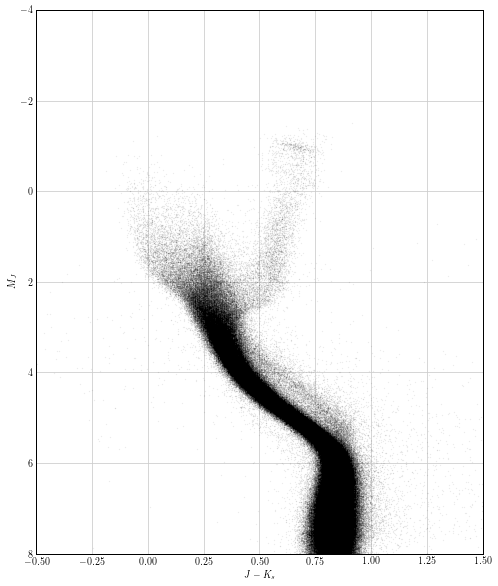

In [8]:
# HR diagram
JK = np.linspace(0, 0.86, 100)
plt.figure(figsize=(8,10))
df.viz.scatter("JK", "M_J", c='k', alpha=0.1, s=0.1, length_check=False)
plt.xlabel(r"$J-K_s$")
plt.ylabel(r"$M_J$")
plt.xlim(-0.5, 1.5)
plt.ylim(-4, 8)
plt.gca().invert_yaxis()
# to save it, uncomment the following line
# plt.savefig(join(gaia_dir, "HR-diagram.pdf"), format="pdf", dpi=70)
plt.show()

In [9]:
# load spectral type classification
df_s = load_spectral_types(root_data_dir)
df_s

,SpT,M_J,J-H,H-Ks,J-K
0,O9V,-3.44,-0.164,-0.071,-0.235
1,O9.5V,-3.30,-0.161,-0.069,-0.230
2,B0V,-3.17,-0.159,-0.067,-0.226
3,B0.5V,-2.80,-0.153,-0.063,-0.216
4,B1V,-2.33,-0.148,-0.059,-0.207
...,...,...,...,...,...
95,T6V,15.34,0.100,-0.030,0.070
96,T7V,15.83,0.000,0.000,0.000
97,T7.5V,16.61,0.200,-0.050,0.150
98,T8V,17.30,0.200,-0.050,0.150


In [10]:
# save classification it into numpy array
jk = df_s["J-K"].to_numpy()
mj = df_s["M_J"].to_numpy()
# cut it below M_J < 5
check = mj < 5
jk = jk[check]
mj = mj[check]

In [11]:
# hand drawn boundaries, need improvement
up_x = np.loadtxt(join(root_data_dir, "upper.csv"), delimiter=",", usecols=0)
up_y = np.loadtxt(join(root_data_dir, "upper.csv"), delimiter=",", usecols=1)

low_x = np.loadtxt(join(root_data_dir, "lower.csv"), delimiter=",", usecols=0)
low_y = np.loadtxt(join(root_data_dir, "lower.csv"), delimiter=",", usecols=1)

In [12]:
# interpolate the boundaries, to make it smooth
j_interp = interpolate.interp1d(jk, mj, kind='cubic')
jks = np.linspace(jk.min(), jk.max(), 100)

j_upper = interpolate.interp1d(up_x, up_y, fill_value="extrapolate")(jks)
j_lower = interpolate.interp1d(low_x, low_y, fill_value="extrapolate")(jks)+0.15

In [13]:
# interpolated boundaries
j_lower_interp = interpolate.interp1d(jks, j_lower, kind='cubic', fill_value="extrapolate")
j_upper_interp = interpolate.interp1d(jks, j_upper, kind='cubic', fill_value="extrapolate")

df_mask_65 = df.filter("JK < 0.65").filter("JK > -0.019")
df_mask_65 = df.extract()

df_mask_65["M_J_lower"] = j_lower_interp(df_mask_65["JK"].to_numpy())
df_mask_65["M_J_upper"] = j_upper_interp(df_mask_65["JK"].to_numpy())
df_mask_65

#,ra,dec,Jmag,Kmag,ph_qual,source_id,pm,pmra,e_pmra,pmdec,e_pmdec,parallax,e_parallax,gmag,bpmag,rpmag,fb_over_err,fr_over_err,ruwe,excess_factor,GLON,GLAT,distance_gspphot,distance_gspphot_lower,distance_gspphot_upper,ag_gspphot,ag_gspphot_lower,ag_gspphot_upper,spectraltype_esphs,subclass_lamost,rv,e_rv,rv_cat,teff,e_teff_lower,e_teff_upper,teff_symmetric,teff_cat,logg,e_logg_lower,e_logg_upper,logg_symmetric,logg_cat,mh,e_mh_lower,e_mh_upper,mh_symmetric,mh_cat,alphafe,e_alphafe_lower,e_alphafe_upper,alphafe_symmetric,alphafe_cat,fem,e_fem_lower,e_fem_upper,fem_symmetric,fem_cat,feh,e_feh_lower,e_feh_upper,feh_symmetric,feh_cat,JK,M_J,Dist,z,r,pmlon,pmlat,e_pmlon,e_pmlat,vb,vphi,e_vb,e_vphi,w,e_w,v_xy,e_v_xy,v,e_v,u,e_u,M_J_lower,M_J_upper
0,0.010526307611580561,-1.5069479765134466,11.213,10.416,AAA,4616283493156832640,64.95028,-64.84678804028577,0.012385076,3.665080655375059,0.012390014,11.816099401085904,0.010756382,13.39838,14.354399,12.430805,817.97473,2392.0107,1.0612296,1.3268741,2.1613254142300296,-0.5358186393427844,84.852,84.6924,85.3004,0.3554,0.3498,0.3623,M,--,32.41990661621094,1.0216929912567139,gaia,3918.379638671875,5.97119140625,8.631103515625,0.0,gspphot,4.763700008392334,0.004499912261962891,0.010499954223632812,0.0,gspphot,-0.4165000021457672,0.039000004529953,0.03979998826980591,0.0,gspphot,0.07999999821186066,0.04999999888241291,0.07000000774860382,0.0,gspspec,nan,nan,nan,nan,--,nan,nan,nan,nan,--,0.79699993,6.575370976314297,84.63029685651593,-43.20758491657852,72.76944243086287,64.06734159660076,10.673072476874871,0.01238531435714347,0.012389775429348222,4.281477484502003,25.70046077472735,0.006316063581639582,0.023917262738082538,-12.87039250998578,0.5216486401636996,30.062175421832617,0.8785096227461723,4.609353189730783,0.4895579458545102,-39.28106335498894,0.7298521839148095,5.274227298919868,5.724228230022163
1,0.009947399351986562,-1.4741853713800026,11.75,10.915,AAA,4617667606497642368,17.977585,-0.17262960984553632,0.0150076,17.976755781051242,0.0134245,7.029261215530585,0.011353876,13.687114,14.494421,12.8082485,1078.7208,2067.6946,1.0101151,1.2904923,2.1699227065693796,-0.5677539259120619,nan,nan,nan,nan,nan,nan,K,--,48.249412536621094,1.7350472211837769,gaia,nan,nan,nan,nan,--,nan,nan,nan,nan,--,nan,nan,nan,nan,--,nan,nan,nan,nan,--,nan,nan,nan,nan,--,nan,nan,nan,nan,--,0.83500004,5.9845484125253865,142.2624610664035,-76.5001755789673,119.94303216551242,4.207349610198228,-17.47832253539565,0.01493170232219195,0.01350886843944294,-11.786053509397416,2.837117093938337,-0.021104384113212568,0.011062597394465627,-35.88257568124676,0.9331734551441357,34.34177674400418,1.4628812519752585,-17.02308452820295,0.8250003773909808,-29.96033138143503,1.2081052585542995,5.4159946919053255,5.843852436790257
2,0.010653943539778906,-1.4792054270009287,13.134,12.317,AAA,4617601567080525696,19.89435,-18.57644369982859,0.035945002,-7.12045526211935,0.036764037,5.814933551816721,0.028319241,15.729542,17.009684,14.611902,176.59393,689.67365,1.068048,1.4013869,2.168515313114387,-0.5628743542169623,171.8243,170.5648,174.2696,0.4268,0.4198,0.433,M,--,nan,nan,--,3588.7626953125,3.59375,3.5283203125,0.0,gspphot,4.771900177001953,0.008300304412841797,0.006099700927734375,0.0,gspphot,-0.03759999945759773,0.016300000250339508,0.017299998551607132,0.0,gspphot,nan,nan,nan,nan,--,nan,nan,nan,nan,--,nan,nan,nan,nan,--,0.81699944,6.956723606222691,171.9710106898086,-91.76705233314686,145.4401479088898,16.517775929900683,11.088201928281167,0.03598627036182269,0.03672364252112022,9.038465645687793,13.464342663600737,0.05323251028082858,0.07183479882735357,nan,nan,nan,nan,nan,nan,nan,nan,5.349391633886626,5.786087504740863
3,0.016341378160082746,-1.479983459874883,10.771,9.922,AAA,4617597821869045376,165.77199,-158.5591365798796,0.0195189,48.36682806934114,0.021476625,33.304022686789395,0.015516205,13.741122,15.407431,12.503449,374.39804,1426.038,1.3580959,1.4723712,2.16772823088462,-0.5622315617141247,29.8859,29.8674,29.9026,0

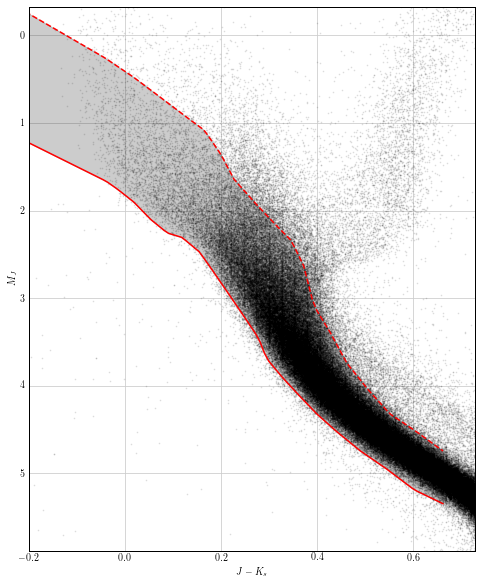

In [14]:
# HR diagram
plt.figure(figsize=(8,10))
df.viz.scatter("JK", "M_J", c='k', alpha=0.1, s=0.5, length_check=False)
# df_rv.viz.scatter("JK", "M_J", c='r', alpha=0.1, s=0.5, length_check=False)
plt.plot(jks, j_upper, 'r')
plt.fill_between(jks, j_upper, j_lower, alpha=0.2, color="k")
# plt.plot(jks, j_upper-1.4, 'r')
plt.plot(jks, j_lower, 'r--')
plt.xlabel(r"$J-K_s$")
plt.ylabel(r"$M_J$")
plt.xlim(-0.2, jks[-1]*1.1)
plt.ylim(j_lower.min()*0.9, j_upper.max()*1.1)
plt.gca().invert_yaxis()
plt.show()

In [15]:
jk_s_stretch = np.linspace(0, 0.5**3.2, 7)
jk_s = np.power(jk_s_stretch, 1/3.2)-0.1
df_mask = []
for jk_low, jk_high in zip(jk_s[:-1], jk_s[1:]):
    # print(jk_low, jk_high)
    df_mask = df.filter(f"JK < {jk_high}").filter(f"JK > {jk_low}")
    df_mask = df_mask.extract()
    df_mask["M_J_lower"] = j_lower_interp(df_mask["JK"].to_numpy())
    df_mask["M_J_upper"] = j_upper_interp(df_mask["JK"].to_numpy())
    df_mask["M_J_lower"] = df_mask["M_J_lower"].astype("float64")
    df_mask["M_J_upper"] = df_mask["M_J_upper"].astype("float64")
    df_mask = df_mask.filter("M_J < M_J_upper").filter("M_J > M_J_lower")
    name = f"gaia_({jk_low:.2f})_({jk_high:.2f}).hdf5"
    print(name, len(df_mask))
    df_mask.export_hdf5(join(data_dir, name), progress=True)


gaia_(-0.10)_(0.19).hdf5 5754
export(hdf5) [########################################] 100.00% elapsed time  :     6.12s =  0.1m =  0.0h   
 gaia_(0.19)_(0.25).hdf5 8581
export(hdf5) [########################################] 100.00% elapsed time  :     5.61s =  0.1m =  0.0h 
 gaia_(0.25)_(0.30).hdf5 12352
export(hdf5) [########################################] 100.00% elapsed time  :     5.91s =  0.1m =  0.0h  
 gaia_(0.30)_(0.34).hdf5 14217
export(hdf5) [########################################] 100.00% elapsed time  :     6.35s =  0.1m =  0.0h     
 gaia_(0.34)_(0.37).hdf5 14088
export(hdf5) [########################################] 100.00% elapsed time  :     5.91s =  0.1m =  0.0h      
 gaia_(0.37)_(0.40).hdf5 11884
export(hdf5) [########################################] 100.00% elapsed time  :     5.68s =  0.1m =  0.0h  
 